### Importing the libraries and the dataset

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Cleaning

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
import tensorflow as tf

### Generating the feature columns

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

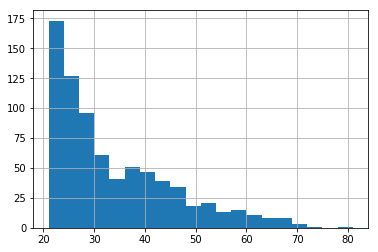

In [14]:
diabetes['Age'].hist(bins=20)

In [17]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [18]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
labels = diabetes['Class']

### Performing the test train split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=42)

In [25]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [26]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shikh\\AppData\\Local\\Temp\\tmp65l14uib', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [27]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shikh\AppData\Local\Temp\tmp65l14uib\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 271.733
INFO:tensorflow:loss = 5.45387, step = 101 (0.372 sec)
INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 4.85531, step = 201 (0.280 sec)
INFO:tensorflow:global_step/sec: 353.054
INFO:tensorflow:loss = 6.375, step = 301 (0.284 sec)
INFO:tensorflow:global_step/sec: 343.383
INFO:tensorflow:loss = 3.39003, step = 401 (0.286 sec)
INFO:tensorflow:global_step/sec: 323.442
INFO:tensorflow:loss = 3.73257, step = 501 (0.311 sec)
INFO:tensorflow:global_step/sec: 363.287
INFO:tensorflow:loss = 5.52807, step = 601 (0.277 sec)
INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 4.16751, step = 701 (0.285 sec)
INFO:tensorflow:global_step/sec: 310.426
INFO:tensorflow:loss = 5.92616, step = 801 (0.324 sec)
INFO:tensorflow:global_step/sec: 322.404
INFO

In [28]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Starting evaluation at 2019-07-16-08:38:19
INFO:tensorflow:Restoring parameters from C:\Users\shikh\AppData\Local\Temp\tmp65l14uib\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-16-08:38:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.727273, accuracy_baseline = 0.65368, auc = 0.765439, auc_precision_recall = 0.610699, average_loss = 0.548138, global_step = 1000, label/mean = 0.34632, loss = 5.27583, prediction/mean = 0.37448


{'accuracy': 0.72727275,
 'accuracy_baseline': 0.65367961,
 'auc': 0.7654388,
 'auc_precision_recall': 0.61069894,
 'average_loss': 0.54813796,
 'label/mean': 0.34632036,
 'loss': 5.2758279,
 'prediction/mean': 0.37448025,
 'global_step': 1000}

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
predictions = model.predict(pred_input_func)
pred = list(predictions)
pred

INFO:tensorflow:Restoring parameters from C:\Users\shikh\AppData\Local\Temp\tmp65l14uib\model.ckpt-1000


[{'logits': array([ 0.31561261], dtype=float32),
  'logistic': array([ 0.57825464], dtype=float32),
  'probabilities': array([ 0.42174536,  0.57825464], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.57211471], dtype=float32),
  'logistic': array([ 0.17191513], dtype=float32),
  'probabilities': array([ 0.82808483,  0.17191513], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.42102659], dtype=float32),
  'logistic': array([ 0.1945007], dtype=float32),
  'probabilities': array([ 0.80549926,  0.19450068], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.26440012], dtype=float32),
  'logistic': array([ 0.43428239], dtype=float32),
  'probabilities': array([ 0.56571764,  0.43428239], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=obj

### DNN Classifier

In [30]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shikh\\AppData\\Local\\Temp\\tmp25a8zyn2', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [37]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shikh\\AppData\\Local\\Temp\\tmpye3lpo64', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [39]:
dnn_model.train(input_fn=input_func,steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shikh\AppData\Local\Temp\tmpye3lpo64\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\shikh\AppData\Local\Temp\tmpye3lpo64\model.ckpt.
INFO:tensorflow:loss = 4.08914, step = 2001
INFO:tensorflow:global_step/sec: 335.344
INFO:tensorflow:loss = 2.69004, step = 2101 (0.300 sec)
INFO:tensorflow:global_step/sec: 387.133
INFO:tensorflow:loss = 2.13474, step = 2201 (0.261 sec)
INFO:tensorflow:global_step/sec: 330.915
INFO:tensorflow:loss = 2.80901, step = 2301 (0.297 sec)
INFO:tensorflow:global_step/sec: 348.151
INFO:tensorflow:loss = 5.9089, step = 2401 (0.290 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 4.32556, step = 2501 (0.288 sec)
INFO:tensorflow:global_step/sec: 321.371
INFO:tensorflow:loss = 4.28954, step = 2601 (0.309 sec)
INFO:tensorflow:global_step/sec: 345.748
INFO:tensorflow:loss = 1.56378, step = 2701 (0.291 sec)
INFO:tensorflow:global_s

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-16-08:49:44
INFO:tensorflow:Restoring parameters from C:\Users\shikh\AppData\Local\Temp\tmpye3lpo64\model.ckpt-4000
INFO:tensorflow:Finished evaluation at 2019-07-16-08:49:45
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.727273, accuracy_baseline = 0.65368, auc = 0.77558, auc_precision_recall = 0.614064, average_loss = 0.615108, global_step = 4000, label/mean = 0.34632, loss = 5.92042, prediction/mean = 0.366509


{'accuracy': 0.72727275,
 'accuracy_baseline': 0.65367961,
 'auc': 0.77557951,
 'auc_precision_recall': 0.61406362,
 'average_loss': 0.61510849,
 'label/mean': 0.34632036,
 'loss': 5.9204192,
 'prediction/mean': 0.36650878,
 'global_step': 4000}